<a href="https://colab.research.google.com/github/Amrutasutrave/colab_files/blob/main/salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
sd=pd.read_csv('/content/Salary_Data.csv')

In [ ]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
sd.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [ ]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
sd.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
sd.shape

(30, 2)

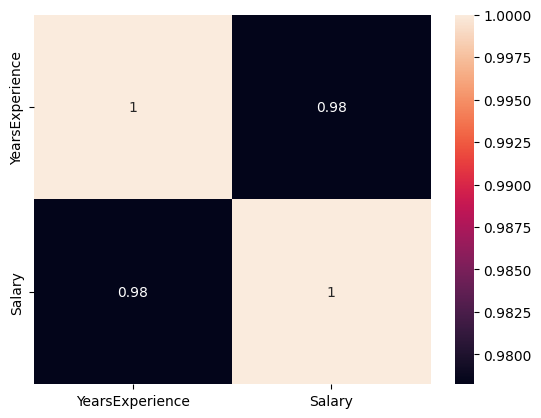

In [ ]:
#visualization to check relationship
plt.figure()
sns.heatmap(sd.corr(),annot=True)
plt.show()

In [ ]:
Y=sd['YearsExperience'] #feature
X=sd['Salary'] #target

In [ ]:
#splitting dataset into train & test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
#model------LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [ ]:
lr.intercept_

26049.577715443353

In [ ]:
lr.coef_

array([9202.23359825])

In [ ]:
#calculating ypredict
ypred=lr.predict(np.array(x_train).reshape(-1,1))
ypred

array([ 98747.22314165, 101507.89322113,  46294.4916316 ,  39852.92811283,
       108869.68009974,  53656.27851021,  80342.75594515,  63778.73546829,
        55496.72522986, 114391.02025869,  38012.48139317,  72980.96906654,
        36172.03467352,  71140.52234689, 122673.03049712, 120832.58377747,
        60097.84202899,  55496.72522986,  62858.51210846,  62858.51210846,
        52736.05515038])

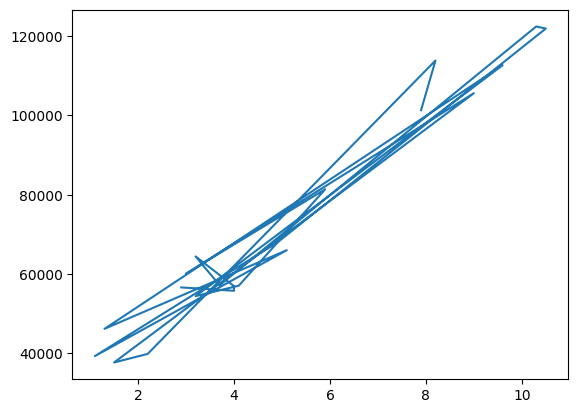

In [ ]:
plt.figure()
#sns.scatterplot(x_train,y_train)
plt.plot(x_train,y_train)
plt.show()

In [ ]:
#testing ypred
ypred=lr.predict(np.array(x_test).reshape(-1,1))
ypred

array([ 74821.41578619,  91385.43626305,  61938.28874864,  81262.97930497,
        67459.62890759,  88624.76618357, 113470.79689886,  44454.04491195,
       106109.01002026])

In [ ]:
# For example, if ypred has more samples than y_test, you can slice ypred to match the length of y_test
if len(y_test) != len(ypred):
    ypred = ypred[:len(y_test)]

In [ ]:
#evaluation of model
mse=mean_squared_error(y_test,ypred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,ypred)
print(mse)
print(rmse)
print(mae)

1317689207.7596767
36299.98908759721
31839.928055685414


In [ ]:
ypred.shape

(9,)

In [ ]:
y_test.shape

(9,)

In [ ]:
r2=r2_score(y_test,ypred)
r2

-1.529784190745957